In [495]:
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from itertools import cycle
from scipy.stats import norm
import matplotlib.pyplot as plt
np.random.seed(42)
# creating data
start_date, end_date = datetime(2022, 1, 5), datetime(2022, 8, 7)
df = pd.DataFrame({'date': [start_date + timedelta(days=i) for i in range((end_date - start_date).days + 1)]})
# creating income 
value_intervals = {0: range(300, 351), 1: range(310, 370), 2: range(810, 850), 3: range(750, 800),
                   4: range(1500, 1600), 5: range(1500, 1600), 6: range(1300, 1400)}
df['income_of_bar'] = df['date'].dt.weekday.map(lambda x: np.random.choice(value_intervals[x]))
# to bring it to normal distribution
transformed_values = {}
for key, value_range in value_intervals.items():
    quantiles = np.linspace(0, 1, len(value_range))
    transformed_values[key] = [round(norm.ppf(q), 2) for q in quantiles]
df['income_of_bar_norm'] = df['date'].dt.weekday.map(lambda x: np.random.choice(transformed_values[x]))

df['day_of_week'] = df['date'].dt.day_of_week

# work shift 2 work 2 off
sequence = cycle([1, 1, 0, 0])
df['shift'] = [next(sequence) for i in range(len(df))]

# if it is Thursday and after, and one of the person steals money + 40 % of his salary
df['salary_with_extra_money'] = df.apply(lambda row: 80 if (row['day_of_week'] < 3 or row['shift'] == 0) else 80 * np.random.uniform(1, 1.8), axis=1).apply(lambda x: round(x, 2))

# to check stealed money
df['stealed_money'] = df['salary_with_extra_money'] - 80
df['inc_after'] = df['income_of_bar'] - df['stealed_money']

df.head()

,date,income_of_bar,income_of_bar_norm,day_of_week,shift,salary_with_extra_money,stealed_money,inc_after
0,2022-01-05,848,-0.23,2,1,80.00,0.00,848.00
1,2022-01-06,778,2.05,3,1,101.00,21.00,757.00
2,2022-01-07,1514,-2.32,4,0,80.00,0.00,1514.00
3,2022-01-08,1571,-2.32,5,0,80.00,0.00,1571.00
4,2022-01-09,1360,1.40,6,1,89.92,9.92,1350.08


Text(0, 0.5, '')

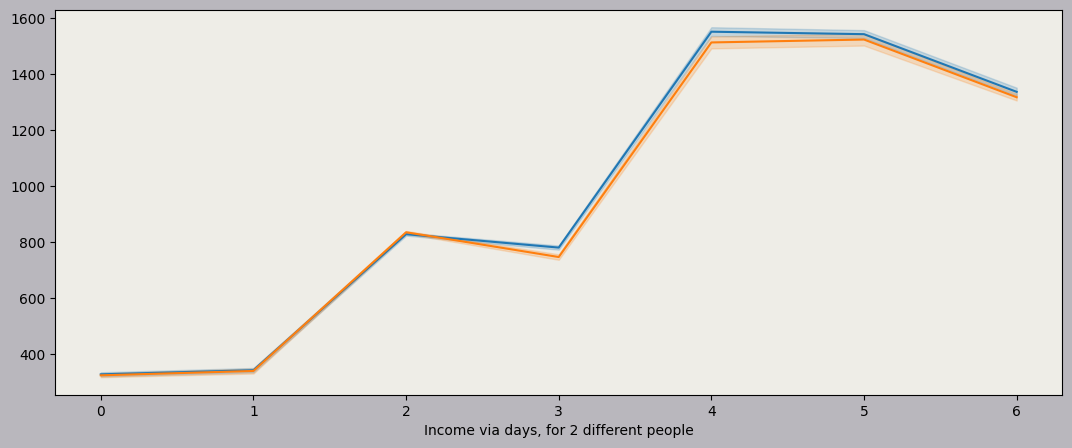

In [496]:
fig, ax = plt.subplots(figsize=(13, 5), facecolor = '#B9B7BD')
sns.lineplot(df[df['shift'] == 0], x = 'day_of_week', y = 'inc_after')
sns.lineplot(df[df['shift'] == 1], x = 'day_of_week', y = 'inc_after')
ax.set_facecolor("#EEEDE7")
ax.set_xlabel('Income via days, for 2 different people')
ax.set_ylabel('')

In [497]:
bar_0 = df[df['shift'] == 0]
bar_1 = df[df['shift'] == 1]

va_0, va_1 = bar_0['inc_after'].std(), bar_1['inc_after'].std()
t = (bar_0['inc_after'].mean() - bar_1['inc_after'].mean()) / ((va_0/len(bar_0) + va_1/len(bar_0))**0.5)
print('t Student == {}, freedom == {}'.format(t,2*(len(bar_0) - 1)))

t Student == 10.507245892468344, freedom == 212
